In [ ]:
# Section 3: Data Analysis Approach

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


In [2]:
df = pd.read_csv('corona_tested_006.csv')

<ipython-input-2-4258ad4fbb53>:1: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('corona_tested_006.csv')


In [ ]:
# 3.1 Approach to Prove or Disprove Hypotheses

# Perform statistical testing (Chi-square test for categorical variables)
chi2, p, _, _ = chi2_contingency(pd.crosstab(df['Cough_symptoms'], df['Corona']))
print(f"Chi-square test p-value for Cough and Corona: {p}")


In [ ]:
# 3.2 Relevant Feature Engineering Techniques

# Handle missing data (for simplicity, filling with mean)
df.fillna(df.mean(), inplace=True)

In [ ]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['Sex'])

In [ ]:
# Create interaction terms (for simplicity, multiplying Age_60_above and Known_contact)
df['InteractionTerm'] = df['Age_60_above'] * df['Known_contact']


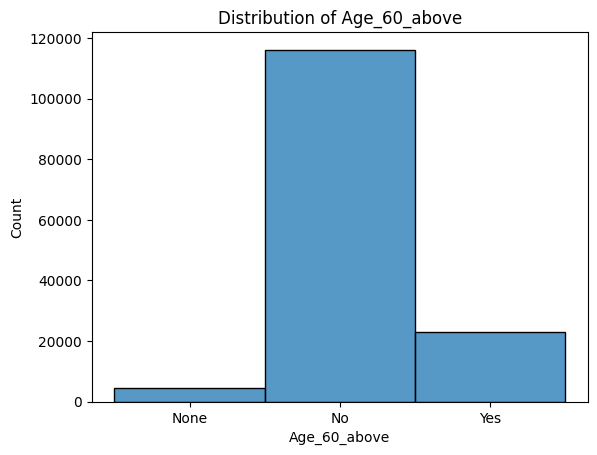

<ipython-input-3-edcee3aa7c83>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


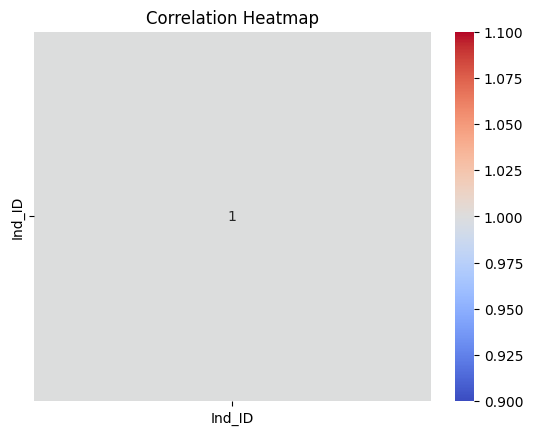

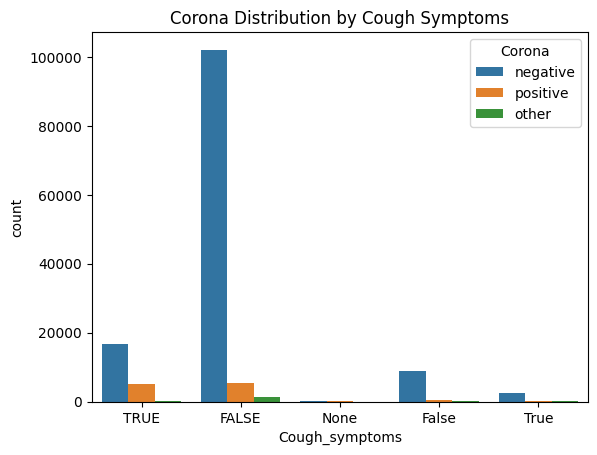

In [3]:
# 3.3 Justification of Data Analysis Approach

# No specific code here; justification involves ensuring alignment with project goals.

# 3.4 Identifying Patterns using EDA

# Visualize feature distributions
sns.histplot(df['Age_60_above'])
plt.title('Distribution of Age_60_above')
plt.show()

# Visualize correlations using a heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Identify patterns in Corona outcomes based on symptoms
sns.countplot(x='Cough_symptoms', hue='Corona', data=df)
plt.title('Corona Distribution by Cough Symptoms')
plt.show()

In [ ]:
#Section 4: Machine Learning Approach

In [5]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# 4.1 Method for Machine Learning Predictions

# Split data into features (X) and target variable (y)
X = df.drop('Corona', axis=1)
y = df['Corona']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.2 Justification of the Most Appropriate Model

# Train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Neural Network': MLPClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")